In [80]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
import seaborn as sns

In [81]:
# Load in the Data
data = pd.read_csv("https://raw.githubusercontent.com/kasterlevi/CSE543_NBA_Project/main/NBA_Player_StatsV2.csv")


In [82]:
# Remove the categorical data and the target features from the original dataframe
# Encode the 'Pos' feature

target_PTS = data['Target_PTS']
target_TRB = data['Target_TRB']
target_AST = data['Target_AST']
X = data.drop(['Player','Unnamed: 0','Tm','Target_PTS', 'Target_TRB', 'Target_AST'], axis=1)
X['Pos'] = X['Pos'].replace({'C': 5, 'PF': 4, 'SF': 3, 'SG': 2, 'PG': 1})

In [83]:
# Split Data into the Same Train and Test Sets

X_train, X_test, y_train_PTS, y_test_PTS = train_test_split(X, target_PTS, test_size=0.15, random_state=15)
X_train, X_test, y_train_TRB, y_test_TRB = train_test_split(X, target_TRB, test_size=0.15, random_state=15)
X_train, X_test, y_train_AST, y_test_AST = train_test_split(X, target_AST, test_size=0.15, random_state=15)

In [84]:
# Get the Linear Regression results on the test set defined above for all statistics, using no feature selection
# Additionally, also get the 'No Model' R2 values for use in paper

model = LinearRegression()
model.fit(X_train, y_train_PTS)
predictions = model.predict(X_test)
r2_PTS_NoSelection = r2_score(y_test_PTS, predictions)
print('R2 score for predicting PTS with no feature selection: '+ str(r2_PTS_NoSelection))

model = LinearRegression()
model.fit(X_train, y_train_TRB)
predictions = model.predict(X_test)
r2_TRB_NoSelection = r2_score(y_test_TRB, predictions)
print('R2 score for predicting TRB with no feature selection: '+ str(r2_TRB_NoSelection))

model = LinearRegression()
model.fit(X_train, y_train_AST)
predictions = model.predict(X_test)
r2_AST_NoSelection = r2_score(y_test_AST, predictions)
print('R2 score for predicting AST with no feature selection: '+ str(r2_AST_NoSelection))

R2 score for predicting PTS with no feature selection: 0.7570238373108176
R2 score for predicting TRB with no feature selection: 0.8052496913346774
R2 score for predicting AST with no feature selection: 0.8233096218144674


In [69]:
# Additionally, also get the 'No Model' R2 values for use in paper
# In this case we just use the previous season points to 'predict' the next season points
prev_PTS = r2_score(y_test_PTS, X_test['PTS'])
print("'No Model' R2 score for PTS: " + str(prev_PTS))

prev_TRB = r2_score(y_test_TRB, X_test['TRB'])
print("'No Model' R2 score for TRB: " + str(prev_TRB))

prev_AST = r2_score(y_test_AST, X_test['AST'])
print("'No Model' R2 score for AST: " + str(prev_AST))

'No Model' R2 score for PTS: 0.6998049654525674
'No Model' R2 score for TRB: 0.7580726690878099
'No Model' R2 score for AST: 0.7937053260268387


In [70]:
# Use Recursive Feature Elimination with Cross Validation to Select the Best Features
# Also print out the number of features left after this cross validation

Recursive_Selector = RFECV(LinearRegression())
Recursive_Selector.fit(X_train, y_train_PTS)
features_PTS = Recursive_Selector.support_
print('Number of PTS Features: ' + str(np.sum(features_PTS)))

Recursive_Selector = RFECV(LinearRegression())
Recursive_Selector.fit(X_train, y_train_TRB)
features_TRB = Recursive_Selector.support_
print('Number of TRB Features: ' + str(np.sum(features_TRB)))

Recursive_Selector = RFECV(LinearRegression())
Recursive_Selector.fit(X_train, y_train_AST)
features_AST = Recursive_Selector.support_
print('Number of AST Features: ' + str(np.sum(features_AST)))

Number of PTS Features: 22
Number of TRB Features: 26
Number of AST Features: 25


In [71]:
# Update the training and test data to reflect the newly selected features
X_train_PTS_updated = X_train.loc[:,features_PTS]
X_test_PTS_updated = X_test.loc[:,features_PTS]

X_train_TRB_updated = X_train.loc[:,features_TRB]
X_test_TRB_updated = X_test.loc[:,features_TRB]

X_train_AST_updated = X_train.loc[:,features_AST]
X_test_AST_updated = X_test.loc[:,features_AST]

In [75]:
# Use the model to get the R^2 Values after features selection has been done

model = LinearRegression()
model.fit(X_train_PTS_updated, y_train_PTS)
predictions = model.predict(X_test_PTS_updated)
r2_PTS_Selection = r2_score(y_test_PTS, predictions)
print('R2 score for predicting PTS with feature selection: '+ str(r2_PTS_Selection))

model = LinearRegression()
model.fit(X_train_TRB_updated, y_train_TRB)
predictions = model.predict(X_test_TRB_updated)
r2_TRB_Selection = r2_score(y_test_TRB, predictions)
print('R2 score for predicting TRB with feature selection: '+ str(r2_TRB_Selection))

model = LinearRegression()
model.fit(X_train_AST_updated, y_train_AST)
predictions = model.predict(X_test_AST_updated)
r2_AST_Selection = r2_score(y_test_AST, predictions)
print('R2 score for predicting AST with feature selection: '+ str(r2_AST_Selection))

R2 score for predicting PTS with feature selection: 0.7572844130088687
R2 score for predicting TRB with feature selection: 0.805254424998048
R2 score for predicting AST with feature selection: 0.8233895761335353


Text(0.5, 1.0, 'R^2 Value by Each Statistic and Model Type')

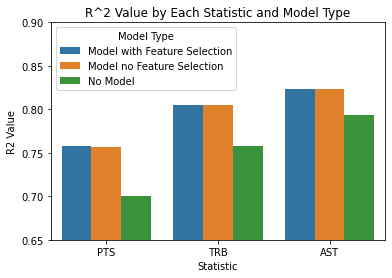

In [76]:
PTS_values = [r2_PTS_Selection, r2_PTS_NoSelection, prev_PTS]
TRB_values = [r2_TRB_Selection, r2_TRB_NoSelection, prev_TRB]
AST_values = [r2_AST_Selection, r2_AST_NoSelection, prev_AST]
PTS_names = ['Model with Feature Selection', 'Model no Feature Selection','No Model']

graph_df = pd.DataFrame(zip(PTS_names*3, ["PTS"]*3+["TRB"]*3+["AST"]*3, PTS_values+TRB_values+AST_values), columns=["Model Type", "Statistic", "R2 Value"])
# graph_df = pd.DataFrame(data={'PTS': PTS_values, 'TRB': TRB_values, 'AST': AST_values}, index=PTS_names)
sns.barplot(x = "Statistic", y='R2 Value', hue="Model Type", data=graph_df)
plt.ylim(.65,.9)
plt.title('R^2 Value by Each Statistic and Model Type')

In [77]:
# Use Cross Validation to get the R^2 value for PTS using the whole dataset

kf = KFold(n_splits=10, shuffle = True, random_state=1)
values_PTS = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train = X.loc[train_idx,:]
    X_test = X.loc[test_idx,:]
    y_train = target_PTS.loc[train_idx]
    y_test = target_PTS.loc[test_idx]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    values_PTS.append(r2_score(y_test, predictions))
print(np.mean(values_PTS))

0.7598073663540366


In [78]:
# Use Cross Validation to get the R^2 value for AST using the whole dataset

kf = KFold(n_splits=10, shuffle = True, random_state=1)
values_TRB = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train = X.loc[train_idx,:]
    X_test = X.loc[test_idx,:]
    y_train = target_TRB.loc[train_idx]
    y_test = target_TRB.loc[test_idx]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    values_TRB.append(r2_score(y_test, predictions))
print(np.mean(values_TRB))

0.7934835012030222


In [79]:
# Use Cross Validation to get the R^2 value for AST using the whole dataset

kf = KFold(n_splits=10, shuffle = True, random_state=1)
values_AST = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train = X.loc[train_idx,:]
    X_test = X.loc[test_idx,:]
    y_train = target_AST.loc[train_idx]
    y_test = target_AST.loc[test_idx]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    values_AST.append(r2_score(y_test, predictions))
print(np.mean(values_AST))

0.814660923714613
